# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f'{url}{city_url}')
        city_weather = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | auki
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | dahab
Processing Record 7 of Set 1 | shimoda
Processing Record 8 of Set 1 | kayangel
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | fort mcmurray
Processing Record 12 of Set 1 | cibitoke
Processing Record 13 of Set 1 | lijiang
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | lubny
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | labuan
Processing Record 23 

Processing Record 42 of Set 4 | cova figueira
Processing Record 43 of Set 4 | rabaul
Processing Record 44 of Set 4 | tralee
Processing Record 45 of Set 4 | alotau
City not found. Skipping...
Processing Record 46 of Set 4 | nouadhibou
Processing Record 47 of Set 4 | santa uxia de ribeira
City not found. Skipping...
Processing Record 48 of Set 4 | zabol
Processing Record 49 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 0 of Set 5 | krasnyy chikoy
Processing Record 1 of Set 5 | mana
Processing Record 2 of Set 5 | peterhead
Processing Record 3 of Set 5 | fukuecho
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | rakops
Processing Record 6 of Set 5 | constantia
Processing Record 7 of Set 5 | camocim
Processing Record 8 of Set 5 | tortoli
Processing Record 9 of Set 5 | argo
Processing Record 10 of Set 5 | sheldon
Processing Record 11 of Set 5 | alice springs
Processing Record 12 of Set 5 | hawaiian paradise park
Processing Record 13 of Set 5 |

Processing Record 34 of Set 8 | dauphin
Processing Record 35 of Set 8 | kristiansund
Processing Record 36 of Set 8 | conde
Processing Record 37 of Set 8 | salinas
Processing Record 38 of Set 8 | balabac
Processing Record 39 of Set 8 | waddan
Processing Record 40 of Set 8 | luderitz
Processing Record 41 of Set 8 | lapeer
Processing Record 42 of Set 8 | flen
Processing Record 43 of Set 8 | sao vicente
Processing Record 44 of Set 8 | barcelos
Processing Record 45 of Set 8 | kharp
Processing Record 46 of Set 8 | sinabang
Processing Record 47 of Set 8 | aswan
Processing Record 48 of Set 8 | sydney mines
Processing Record 49 of Set 8 | scarborough
Processing Record 0 of Set 9 | taunggyi
Processing Record 1 of Set 9 | cole harbour
Processing Record 2 of Set 9 | santyoku
Processing Record 3 of Set 9 | terekeka
City not found. Skipping...
Processing Record 4 of Set 9 | aripuana
Processing Record 5 of Set 9 | east ballina
Processing Record 6 of Set 9 | san carlos de bariloche
Processing Record 7

Processing Record 23 of Set 12 | abeche
-----------------------------
Data Retrieval Complete      
-----------------------------


In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,auki,-8.7676,-8.7676,29.63,70,83,2.99,SB,1701646964
1,invercargill,-46.4000,-46.4000,12.37,47,71,4.73,NZ,1701646964
2,waitangi,-43.9535,-43.9535,12.68,94,100,1.34,NZ,1701646965
3,adamstown,-25.0660,-25.0660,22.85,80,59,5.18,PN,1701646966
4,port-aux-francais,-49.3500,-49.3500,4.63,78,73,13.99,TF,1701646967


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,auki,-8.7676,-8.7676,29.63,70,83,2.99,SB,1701646964
1,invercargill,-46.4000,-46.4000,12.37,47,71,4.73,NZ,1701646964
2,waitangi,-43.9535,-43.9535,12.68,94,100,1.34,NZ,1701646965
3,adamstown,-25.0660,-25.0660,22.85,80,59,5.18,PN,1701646966
4,port-aux-francais,-49.3500,-49.3500,4.63,78,73,13.99,TF,1701646967


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

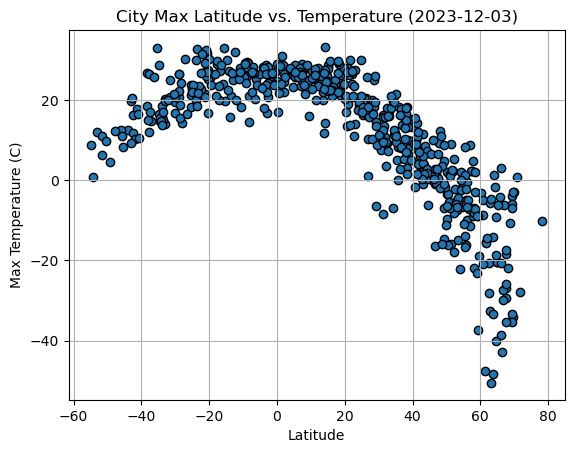

In [27]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

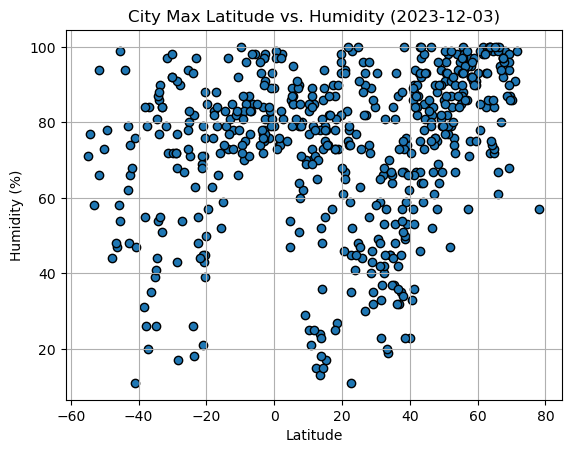

In [28]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

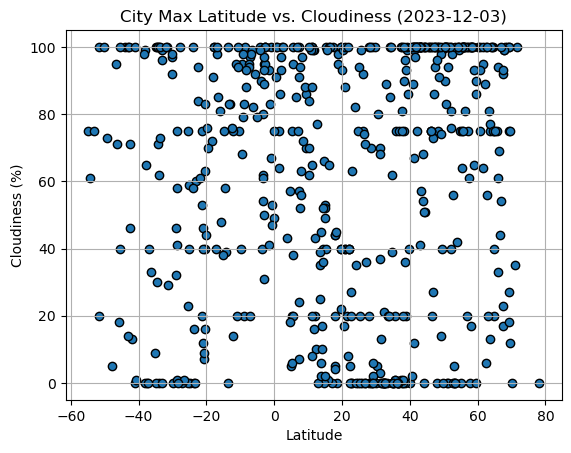

In [29]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

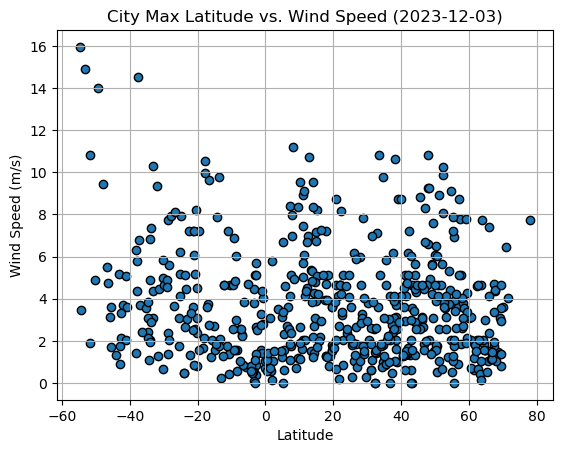

In [30]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def regression(item1,item2):
    output = linregress(item1,item2)
    return output

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,dahab,28.5010,28.5010,25.12,40,70,3.27,EG,1701646967
6,shimoda,34.6667,34.6667,11.20,64,62,1.01,JP,1701646968
7,kayangel,8.0823,8.0823,27.88,80,97,11.20,PW,1701646969
8,longyearbyen,78.2186,78.2186,-10.09,57,0,7.72,SJ,1701646970
9,bethel,41.3712,41.3712,7.93,88,100,4.12,US,1701646674


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,auki,-8.7676,-8.7676,29.63,70,83,2.99,SB,1701646964
1,invercargill,-46.4000,-46.4000,12.37,47,71,4.73,NZ,1701646964
2,waitangi,-43.9535,-43.9535,12.68,94,100,1.34,NZ,1701646965
3,adamstown,-25.0660,-25.0660,22.85,80,59,5.18,PN,1701646966
4,port-aux-francais,-49.3500,-49.3500,4.63,78,73,13.99,TF,1701646967


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8712663007141104


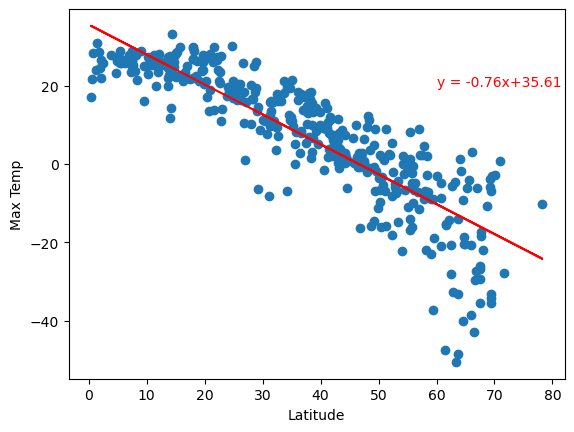

In [94]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (60,20),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.6803014653531282


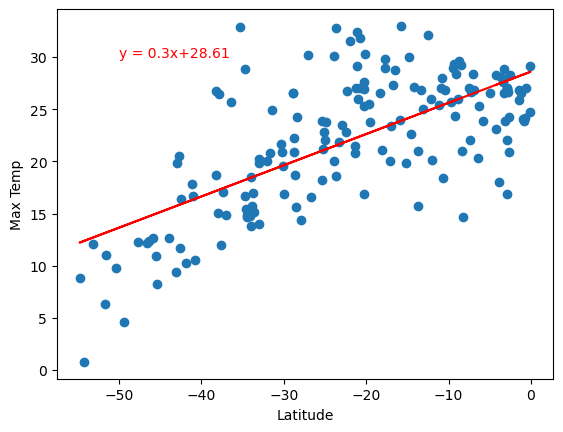

In [96]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-50,30),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()


**Discussion about the linear relationship:** 
In northen hemispheres, there's an inverse relationship between latitudes and max temperatures. The more towards the north we go, the smaller the max temperature is. However, it is the oppositte for the southern hemispheres, the more we go towards the north (the equator), the bigger the max temperature can be. This shows why the correlation coefficient is negative for the northern hemisphere while it is posibite for the southern one.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.3322129449648989


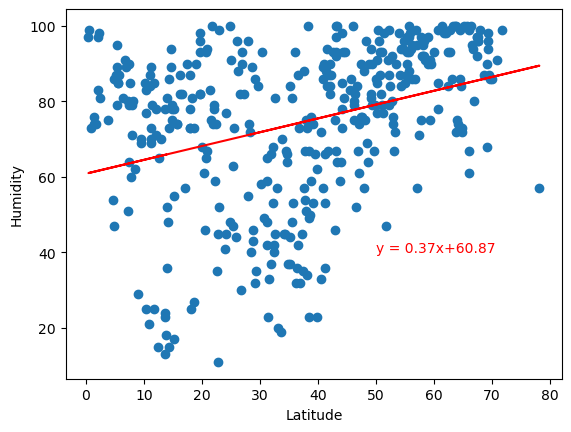

In [98]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (50,40),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.3694097133191313


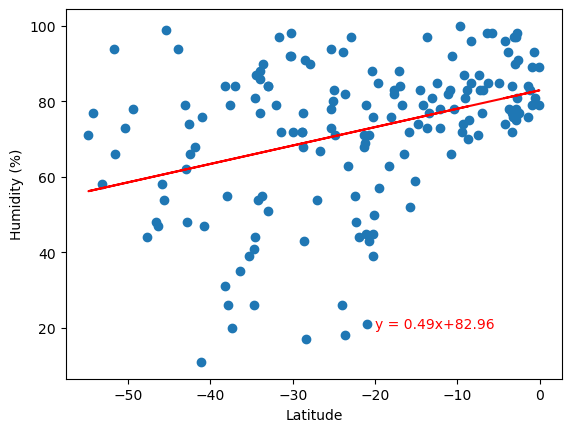

In [102]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-20,20),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:**
For both hemimsphers, the relationship between the humidity level and the latitude is slightly positive. Explaining that the more toward the north we go, the more the humidity level increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.17699820757944326


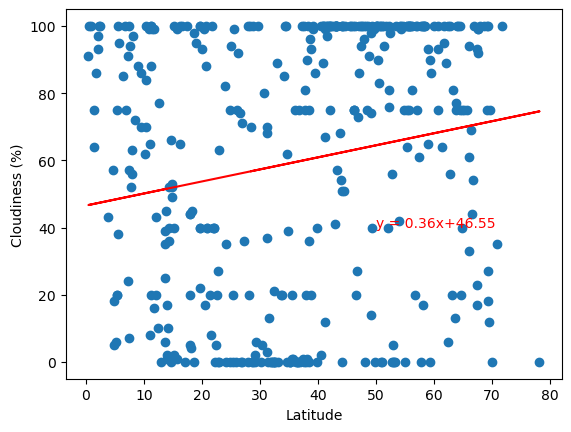

In [103]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (50,40),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.20806098347503882


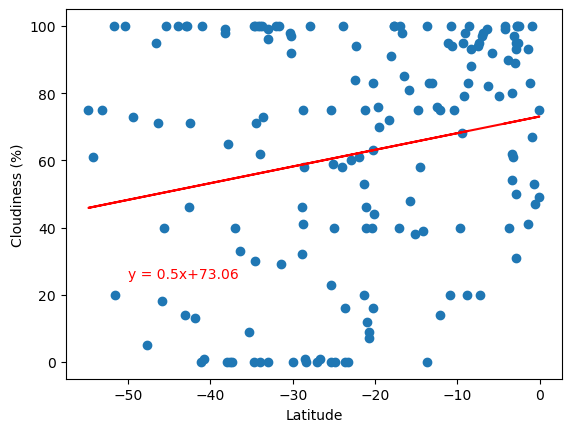

In [105]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-50,25),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:** 
For both hemisphers, we see a positive relationship with the Latitude and Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.03615806914443532


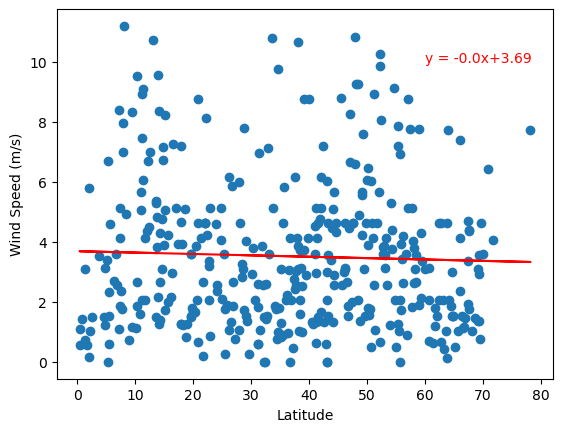

In [107]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (60,10),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:-0.3673121256749967


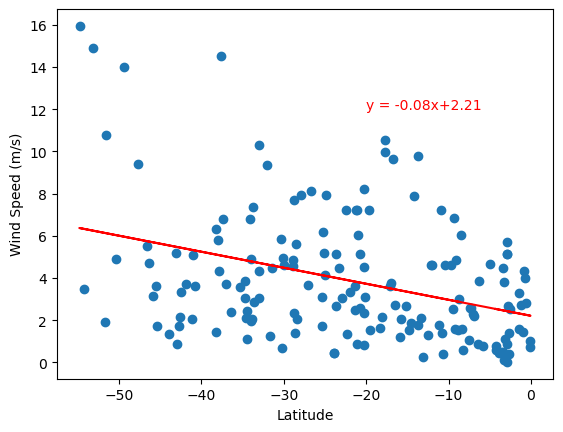

In [109]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-20,12),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE